In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress
from datetime import datetime
from scipy import stats

In [15]:
#Loading data from CSV into a DataFrame
data = pd.read_csv("dog_rates_tweets.csv", parse_dates = True)
print(data)

                        id                 created_at  \
0       994677639364403200        2018-05-10 20:36:44   
1       994364904978239488        2018-05-09 23:54:02   
2       994363623421153280        2018-05-09 23:48:56   
3       994336722875047936        2018-05-09 22:02:03   
4       994024065982717952        2018-05-09 01:19:40   
...                    ...                        ...   
14923  1273020398150414336  2020-06-16 22:31:29+00:00   
14924  1273020243196235777  2020-06-16 22:30:52+00:00   
14925  1273019594601639938  2020-06-16 22:28:17+00:00   
14926  1272937849118011392  2020-06-16 17:03:27+00:00   
14927  1272762231063629825  2020-06-16 05:25:37+00:00   

                                                    text  
0                   @Steff88979267 tell them to h*ck off  
1                              @NFLOwnerGBP take it back  
2      This is Louie. He has misplaced his Cheerio. W...  
3                                    @rachaellanaghan ❤️  
4      This is Capta

We are mostly interested in the created_at and text columns. The regular expression for $n$/10 is given below:

In [16]:
reExpression = r'(\d+(\.\d+)?)/10'

In [17]:
ratings = pd.Series(data['text']).str.extract(reExpression)
print(ratings)

         0    1
0      NaN  NaN
1      NaN  NaN
2       14  NaN
3      NaN  NaN
4      NaN  NaN
...    ...  ...
14923  NaN  NaN
14924  NaN  NaN
14925  NaN  NaN
14926  NaN  NaN
14927  NaN  NaN

[14928 rows x 2 columns]


The first column has the ratings. Tweets with no ratings have a NaN value.

In [18]:
#Appending the ratings column to the data
data['rating'] = data['text'].str.extract(reExpression)[0]
print(data['rating'])

0        NaN
1        NaN
2         14
3        NaN
4        NaN
        ... 
14923    NaN
14924    NaN
14925    NaN
14926    NaN
14927    NaN
Name: rating, Length: 14928, dtype: object


In [19]:
#Dropping any rows with NaN rating
dataWithRatings = data.dropna(how="any")
print(dataWithRatings)

                        id                 created_at  \
2       994363623421153280        2018-05-09 23:48:56   
7       993889039714578432        2018-05-08 16:23:07   
8       993629544463642624        2018-05-07 23:11:58   
24      992198572664860672        2018-05-04 00:25:48   
30      991744041351090177        2018-05-02 18:19:39   
...                    ...                        ...   
14885  1275493485085245440  2020-06-23 18:18:39+00:00   
14895  1275102054608855040  2020-06-22 16:23:14+00:00   
14896  1274821722584125442  2020-06-21 21:49:18+00:00   
14906  1273774320519483392  2020-06-19 00:27:18+00:00   
14917  1273345579829977088  2020-06-17 20:03:38+00:00   

                                                    text rating  
2      This is Louie. He has misplaced his Cheerio. W...     14  
7      This is Manny. He hasn’t seen your croissant. ...     13  
8      This is Libby. She leap. 14/10\n(IG: libbythef...     14  
24     This is Rosie. She thought Coachella was thi

In [20]:
#Convert ratings from string to float
dataWithRatings['rating'] = dataWithRatings['rating'].apply(float)
#Dropping any rows with ratings higher than 25
dataWithRatings = dataWithRatings[dataWithRatings['rating'] < 26]
#Changing created_at object type to datetiem
dataWithRatings['created_at'] = pd.to_datetime(dataWithRatings['created_at'])
print(dataWithRatings)

<ipython-input-20-c6b8229fafe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithRatings['rating'] = dataWithRatings['rating'].apply(float)


                        id                 created_at  \
2       994363623421153280        2018-05-09 23:48:56   
7       993889039714578432        2018-05-08 16:23:07   
8       993629544463642624        2018-05-07 23:11:58   
24      992198572664860672        2018-05-04 00:25:48   
30      991744041351090177        2018-05-02 18:19:39   
...                    ...                        ...   
14885  1275493485085245440  2020-06-23 18:18:39+00:00   
14895  1275102054608855040  2020-06-22 16:23:14+00:00   
14896  1274821722584125442  2020-06-21 21:49:18+00:00   
14906  1273774320519483392  2020-06-19 00:27:18+00:00   
14917  1273345579829977088  2020-06-17 20:03:38+00:00   

                                                    text  rating  
2      This is Louie. He has misplaced his Cheerio. W...    14.0  
7      This is Manny. He hasn’t seen your croissant. ...    13.0  
8      This is Libby. She leap. 14/10\n(IG: libbythef...    14.0  
24     This is Rosie. She thought Coachella was

<ipython-input-20-c6b8229fafe8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithRatings['created_at'] = pd.to_datetime(dataWithRatings['created_at'])


In [21]:
dataWithRatings['timestamp'] = dataWithRatings['created_at'].apply(datetime.timestamp)

In [22]:
model = linregress(dataWithRatings['timestamp'], dataWithRatings['rating'])

## Ratings time series

In [23]:
prediction = model[0] * dataWithRatings['timestamp'] +  model[1]
dataWithRatings['prediction'] = prediction

In [24]:
dataWithRatings

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.303514
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.301817
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.300888
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.295770
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.294144
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308733
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307333
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306330
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302583


In [25]:
model.slope, model.intercept

(1.500295334373572e-08, -10.590016533606484)

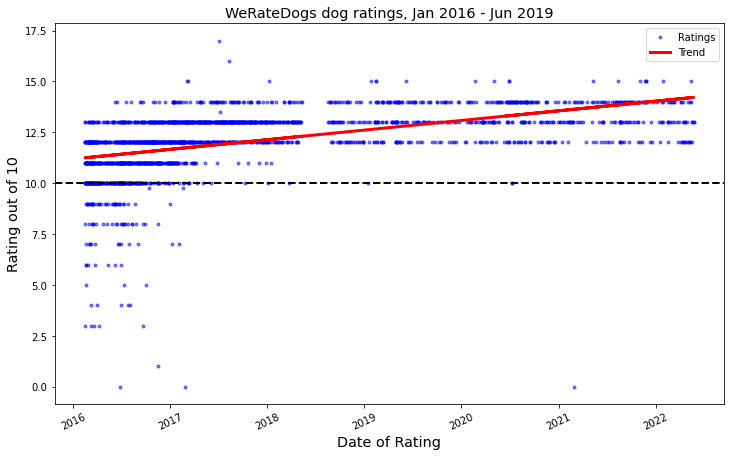

In [26]:
plt.figure(figsize=(12,7))
plt.plot(dataWithRatings['created_at'], dataWithRatings['rating'], 'b.', label='Ratings', alpha=0.5)
plt.plot(dataWithRatings['created_at'], prediction, 'r-', linewidth=3, label = "Trend")
plt.xticks(rotation=25)
plt.xlabel("Date of Rating", size = 'x-large')
plt.ylabel("Rating out of 10", size = 'x-large')
plt.title("WeRateDogs dog ratings, Jan 2016 - Jun 2019", size = 'x-large')
plt.axhline(y=10, color='black', linestyle='--', linewidth = 2)
plt.legend()
plt.show()

In [45]:
print(f'p value: {model.pvalue:.3}')

p value: 2.54e-127


Text(0.5, 0, 'residuals')

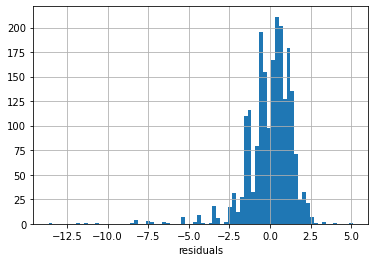

In [46]:
dataWithRatings['residual'] = dataWithRatings['rating'] - dataWithRatings['prediction']
dataWithRatings['residual'].hist(bins='auto')
plt.xlabel('residuals')

In [38]:
model.rvalue

0.4884847815406983

In [48]:
model.pvalue

2.536058725136892e-127